<a href="https://colab.research.google.com/github/C-Kabilan/Path-Planning-for-Autonomous-Vehicles/blob/main/Planning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym numpy matplotlib stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

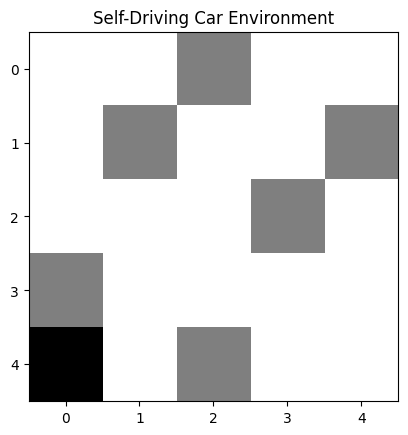

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the road grid (5x5)
road = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1],
    [0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0]
])

# Define car's starting position
car_position = [4, 0]  # Bottom-left

# Function to visualize the road
def plot_road(road, car_position):
    road_copy = road.copy()
    road_copy[car_position[0], car_position[1]] = 2  # Mark the car position
    plt.imshow(road_copy, cmap="gray_r", interpolation="nearest")
    plt.title("Self-Driving Car Environment")
    plt.show()

plot_road(road, car_position)


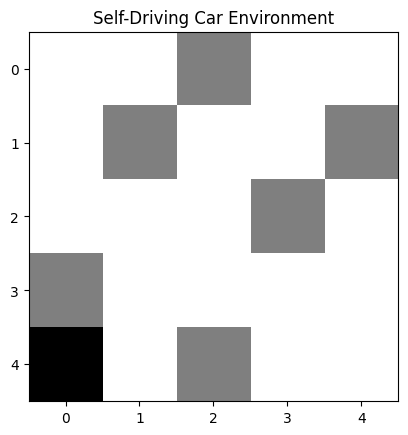

In [ ]:
actions = {
    0: (-1, 0),  # Left
    1: (1, 0),   # Right
    2: (0, -1),  # Up
    3: (0, 1)    # Down
}

def move_car(action, position):
    new_position = [position[0] + actions[action][0], position[1] + actions[action][1]]

    # Check if the new position is within bounds and not an obstacle
    if 0 <= new_position[0] < road.shape[0] and 0 <= new_position[1] < road.shape[1]:
        if road[new_position[0], new_position[1]] == 1:  # Obstacle detected
            return position  # Stay in the same place
        return new_position  # Move if safe
    return position  # Stay if out of bounds

# Example: Move Right (1)
car_position = move_car(1, car_position)
plot_road(road, car_position)


In [ ]:
import random

# Define rewards
def get_reward(position):
    if position == [0, 4]:  # Goal
        return 100
    elif road[position[0], position[1]] == 1:  # Obstacle
        return -50
    return -1  # Default penalty to encourage efficiency

# AI chooses an action using Q-learning
def choose_action(q_table, position, epsilon=0.2):
    if random.uniform(0, 1) < epsilon:  # Explore
        return random.choice(list(actions.keys()))
    return np.argmax(q_table[position[0], position[1]])  # Exploit best action

# Initialize Q-table
q_table = np.zeros((5, 5, 4))  # State: (x, y), Actions: 4

# Training loop
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor

for episode in range(1000):  # Train for 1000 episodes
    position = [4, 0]  # Reset car position

    for _ in range(50):  # Max steps per episode
        action = choose_action(q_table, position)
        new_position = move_car(action, position)
        reward = get_reward(new_position)

        # Update Q-table using Q-learning formula
        old_value = q_table[position[0], position[1], action]
        future_value = np.max(q_table[new_position[0], new_position[1]])
        q_table[position[0], position[1], action] = old_value + alpha * (reward + gamma * future_value - old_value)

        position = new_position
        if position == [0, 4]:  # Goal reached
            break

print("Training Completed!")


Training Completed!


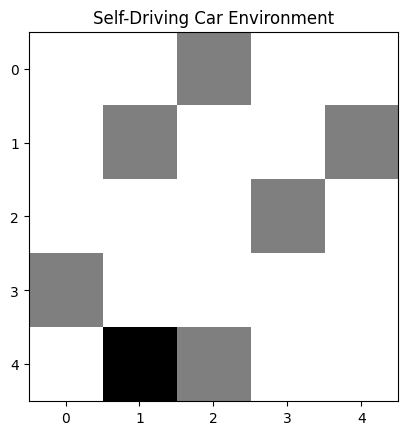

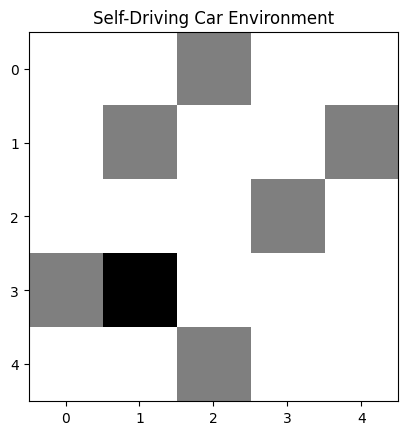

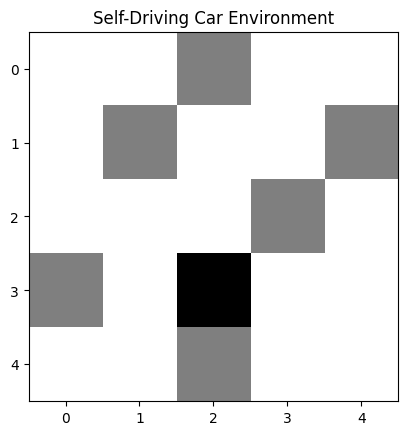

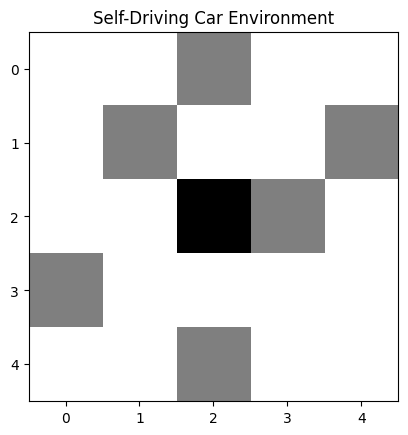

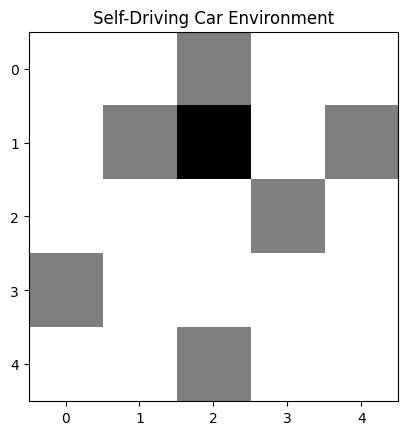

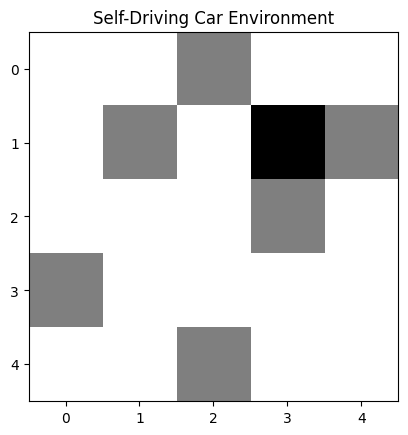

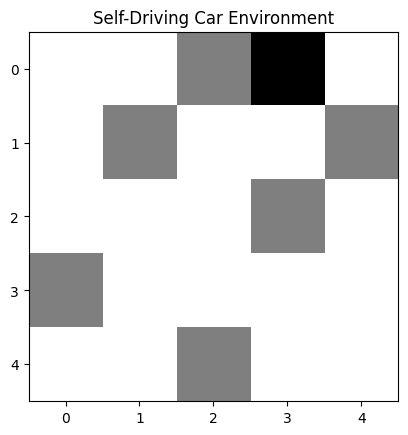

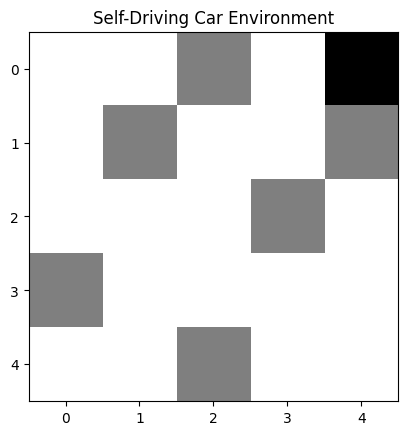

Car reached the destination!


In [ ]:
position = [4, 0]  # Reset car position

for _ in range(20):  # Run 20 steps
    action = np.argmax(q_table[position[0], position[1]])
    position = move_car(action, position)
    plot_road(road, position)
    if position == [0, 4]:  # Goal reached
        print("Car reached the destination!")
        break